In [116]:
import pandas as pd

In [117]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [119]:
df.shape

(768, 9)

In [120]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 1==Diabetes
# 0==Non diabets

In [145]:
label=["Non Diabets","Diabetes"]

In [121]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [122]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


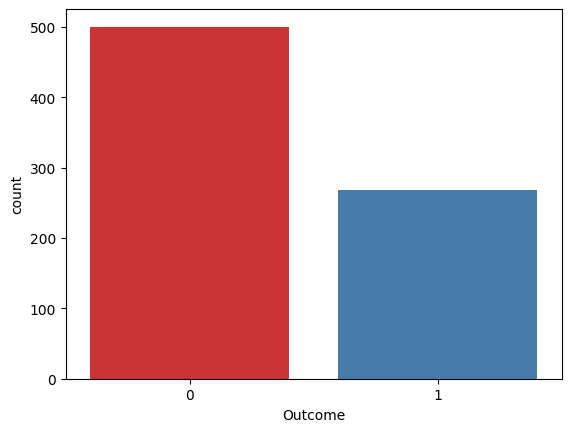

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x="Outcome",palette="Set1")
plt.show()

In [124]:
import plotly.express as px

fig = px.histogram(df, x="Glucose",title="Glucose",color="Outcome")
fig.show()

In [125]:
fig = px.histogram(df, x="BloodPressure",title="BloodPressure",color="Outcome")
fig.show()

In [126]:
fig = px.scatter(df, x="SkinThickness", y="BMI", color="Outcome",
                 size='Insulin', hover_data=['Age'])
fig.show()

In [127]:
fig = px.bar(df, x="Glucose", y=["Age","BloodPressure","SkinThickness"],height=800,text_auto=True)
fig.show()

In [128]:
fig = px.box(df, y="Glucose", points="all")
fig.show()

In [129]:
fig = px.box(df, y="BloodPressure", points="all")
fig.show()

In [130]:
train_data=df.drop(columns=["Outcome"],axis=1)
label_data=df["Outcome"]

In [131]:
train_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data=scaler.fit_transform(train_data)
train_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,label_data, test_size=0.2, random_state=42)

In [134]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [135]:
y_train.shape,y_test.shape

((614,), (154,))

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [141]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,target_names=label)
print("Accuracy score :",accuracy)

Accuracy score : 0.7467532467532467


In [149]:
print(report)

              precision    recall  f1-score   support

 Non Diabets       0.81      0.79      0.80        99
    Diabetes       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Reference

https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html

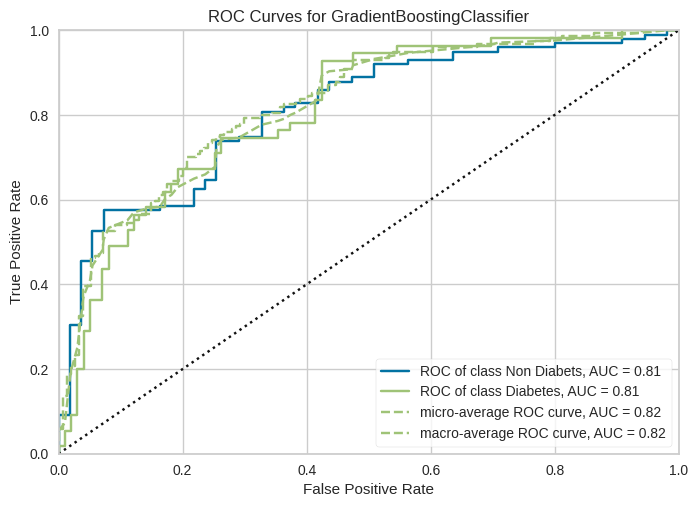

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [151]:
from yellowbrick.classifier import ROCAUC
model =gb
visualizer = ROCAUC(model, classes=label)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [159]:
fig = px.imshow(cf, text_auto=True, aspect="auto",x=label,y=label)
fig.show()

# Custom Data prediction

In [167]:
import numpy as np

input=np.random.rand(8)
input_re=input.reshape(1,-1)
predict = gb.predict(input_re)
if predict==0:
  print("Non Diabetes")
else:
  print("Diabetes")

Diabetes


# Reference

https://youtu.be/xUE7SjVx9bQ?si=fL4zT_pmc3UWuB1z